# 任务说明

## 1.  线性回归模型

给定含有1000条记录的数据集`mlm.csv`，其中每条记录均包含两个自变量`x`,`y`和一个因变量`z`，它们之间存在较为明显的线性关系。

**任务：请对数据进行三维可视化分析，并训练出良好的线性回归模型。**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data from local path
path = 'Dataset/mlm.csv'
data = pd.read_csv(path)
data.head()

,x,y,z
0,64.32,6.21,236.522049
1,9.76,86.65,-283.187014
2,18.33,32.97,-48.807113
3,44.73,93.60,-167.729663
4,40.39,27.69,60.373880


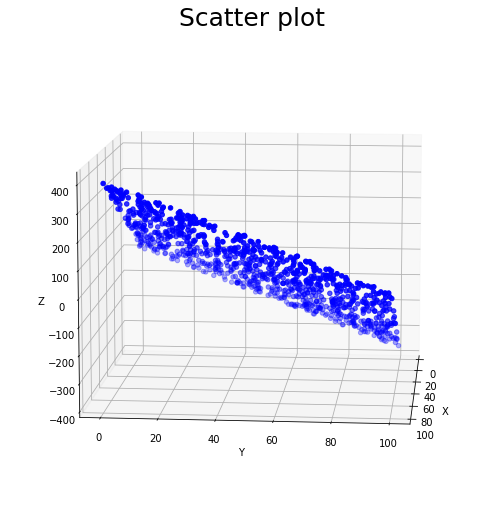

In [3]:
# Plot the data points
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(elev=10.,azim=5)
ax.set_title('Scatter plot', size=25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(data.x,data.y,data.z,c='b',marker='o')

In [4]:
# Define the model class
class LinearRegression(object):
    def __init__(self):
        # Random initialize the parameter w
        self.w = np.random.random((2,1))
    
    def predict(self, x):
        return np.matmul(x,self.w)
    
    def fit(self, x, y):
        # Use normal equation to fit
        self.w = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(),x)),x.transpose()),y)

In [5]:
# Preprocess the data
X = np.array(data.drop('z',axis=1))
y = np.array(data['z'])

In [6]:
# Instantiate the model
model = LinearRegression()
model.fit(X,y)
print(model.w)

[ 4.05875628 -3.73335026]


In [7]:
# Use RMSE for evaluation
prediction = model.predict(X)
rmse = np.sqrt(((prediction-y)**2).sum()/y.shape[0])
print(rmse)

2.406557290667599


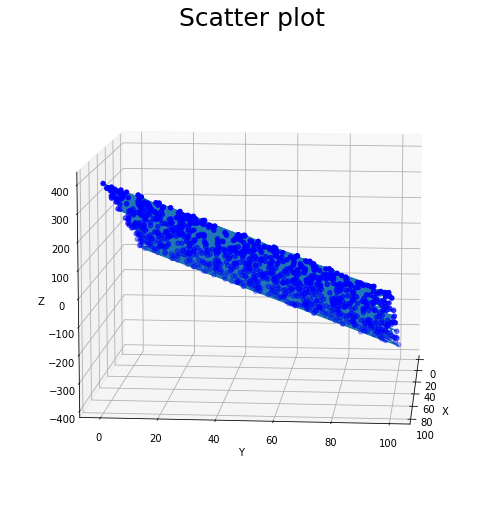

In [8]:
# Plot the data points and the prediction hyperplane
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.view_init(elev=10.,azim=5)
ax.set_title('Scatter plot', size=25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(X[:,0],X[:,1],data.z,c='b',marker='o')
ax.plot3D(X[:,0],X[:,1],prediction)